# Plotting in Julia

- Sort of a mixed bag
- Upside: many options, lots of flexibility

- Downside: many options, lots of flexibility

- Will introduce two options: 
    1. [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl): Julia interface to Python's [`matplotlib.pyplot`](http://matplotlib.org)
    2. [PlotlyJS.jl](http://spencerlyon.com/PlotlyJS.jl/): Interface to [plotly.js](https://plot.ly/javascript/)
- Alternatives
    - [Gadfly.jl](http://gadflyjl.org): Grammar of Graphics style plotting (similar to `ggplot2` from R)
    - [Plots.jl](https://juliaplots.github.io): API that leverages other packages to do plotting
    - [GLPlot.jl](https://github.com/SimonDanisch/GLPlot.jl): high performance GPU powered plotting
    - [GR.jl](https://github.com/jheinen/GR.jl): Julia interface to GR framework
    - ... others

## PyPlot.jl

- Julia interface to `matplotlib.pyplot`
- Very mature, robust, full-featured
- Main downside: sometimes feels a bit "clunky" or "unnatural" to use Python APIs from Julia

In [1]:
# Pkg.add("PyPlot")

### Basic PyPlot

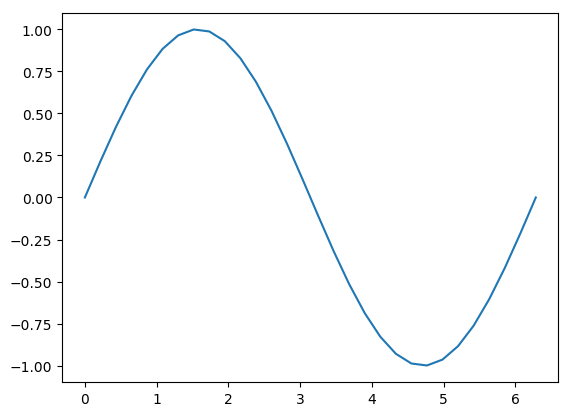

In [12]:
using PyPlot

x = linspace(0, 2π, 30)
plot(x, sin.(x));  # semi-colon supresses matplotlib text

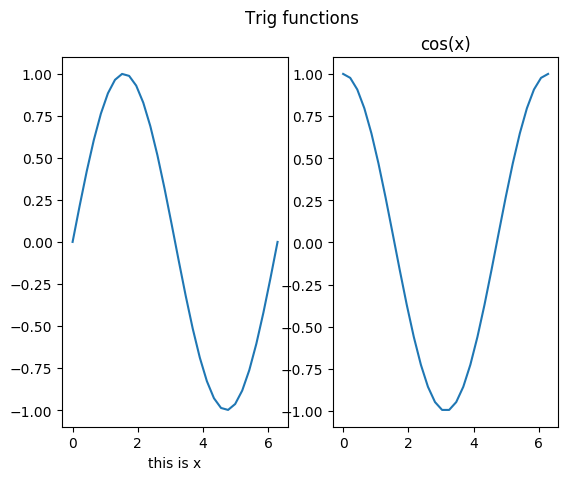

typeof(ax) = Array{PyCall.PyObject,1}


In [17]:
### using object API
# One row, two columns of subplots
fig, ax = subplots(1, 2)

# 1d array of matplotlib axes
@show typeof(ax)

# access methods of ax object using `[:name]` instead of `.name`

# plot on both axes
ax[1][:plot](x, sin.(x), label="sin")
ax[2][:plot](x, cos.(x), label="cos")

# set axes properties
ax[1][:set_xlabel]("this is x")
ax[2][:set_title]("cos(x)")

# set figure property
fig[:suptitle]("Trig functions");

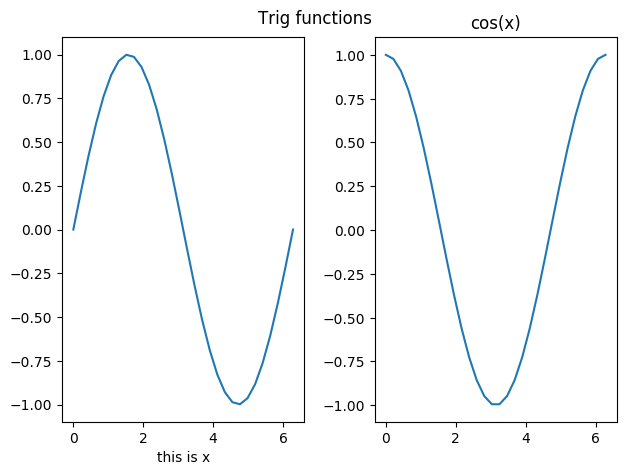

In [20]:
# fix spacing of axes labels
fig[:tight_layout]()

# display fig again by having it as last item in notebook cell
# (notice improved spacing)
fig 